<a href="https://colab.research.google.com/github/RahulBhatt24/NFL-Projects/blob/main/2022_Offensive_Vs_Defensive_EPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing/Loading Packages

In [34]:
# !pip install nfl_data_py
# !pip install pandas
# !pip install os
# !pip install matplotlib

In [35]:
import nfl_data_py as nfl
import pandas as pd
import os
import urllib.request
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Loading Data

In [4]:
pbp = nfl.import_pbp_data([2022])

2022 done.
Downcasting floats.


# Cleaning the Dataset

In [5]:
pbp_rp = pbp[(pbp['pass'] == 1) | (pbp['rush'] == 1)]
pbp_rp = pbp_rp.dropna(subset=['epa', 'posteam', 'defteam'])

# Getting Stats

In [10]:
offensive_epa = pbp_rp.groupby('posteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'offensive_epa'})
offensive_epa.sort_values('offensive_epa', ascending = False)

,posteam,offensive_epa
15,KC,0.181334
25,PHI,0.114468
3,BUF,0.090080
6,CIN,0.085118
28,SF,0.077129
10,DET,0.075952
14,JAX,0.043606
8,DAL,0.041047
23,NYG,0.039260
19,MIA,0.036384


In [13]:
defensive_epa = pbp_rp.groupby('defteam')['epa'].mean().reset_index().rename(columns = {'epa' : 'defensive_epa'})
defensive_epa.sort_values('defensive_epa', ascending = True)

,defteam,defensive_epa
28,SF,-0.090021
21,NE,-0.085218
8,DAL,-0.081351
25,PHI,-0.065302
31,WAS,-0.059633
24,NYJ,-0.045159
9,DEN,-0.042892
6,CIN,-0.038154
3,BUF,-0.035789
22,NO,-0.034779


In [18]:
epa = pd.merge(offensive_epa, defensive_epa, left_on = 'posteam', right_on = 'defteam')
epa.head()

,posteam,offensive_epa,defteam,defensive_epa
0,ARI,-0.079564,ARI,0.012586
1,ATL,0.004599,ATL,0.065810
2,BAL,0.001244,BAL,-0.001529
3,BUF,0.090080,BUF,-0.035789
4,CAR,-0.037302,CAR,0.007986


# Loading Logos

In [20]:
logos = nfl.import_team_desc()[['team_abbr', 'team_logo_espn']]
logo_paths = []
team_abbr = []
if not os.path.exists("logos"):
    os.makedirs("logos")

for team in range(len(logos)):
    urllib.request.urlretrieve(logos['team_logo_espn'][team], f"logos/{logos['team_abbr'][team]}.tif")
    logo_paths.append(f"logos/{logos['team_abbr'][team]}.tif")
    team_abbr.append(logos['team_abbr'][team])

data = {'team_abbr' : team_abbr, 'logo_path' : logo_paths}
logo_data = pd.DataFrame(data)

In [23]:
epa_with_logos = pd.merge(epa, logo_data, left_on = 'posteam', right_on = 'team_abbr')
epa_with_logos.head()

,posteam,offensive_epa,defteam,defensive_epa,team_abbr,logo_path
0,ARI,-0.079564,ARI,0.012586,ARI,logos/ARI.tif
1,ATL,0.004599,ATL,0.065810,ATL,logos/ATL.tif
2,BAL,0.001244,BAL,-0.001529,BAL,logos/BAL.tif
3,BUF,0.090080,BUF,-0.035789,BUF,logos/BUF.tif
4,CAR,-0.037302,CAR,0.007986,CAR,logos/CAR.tif


# Creating Graph

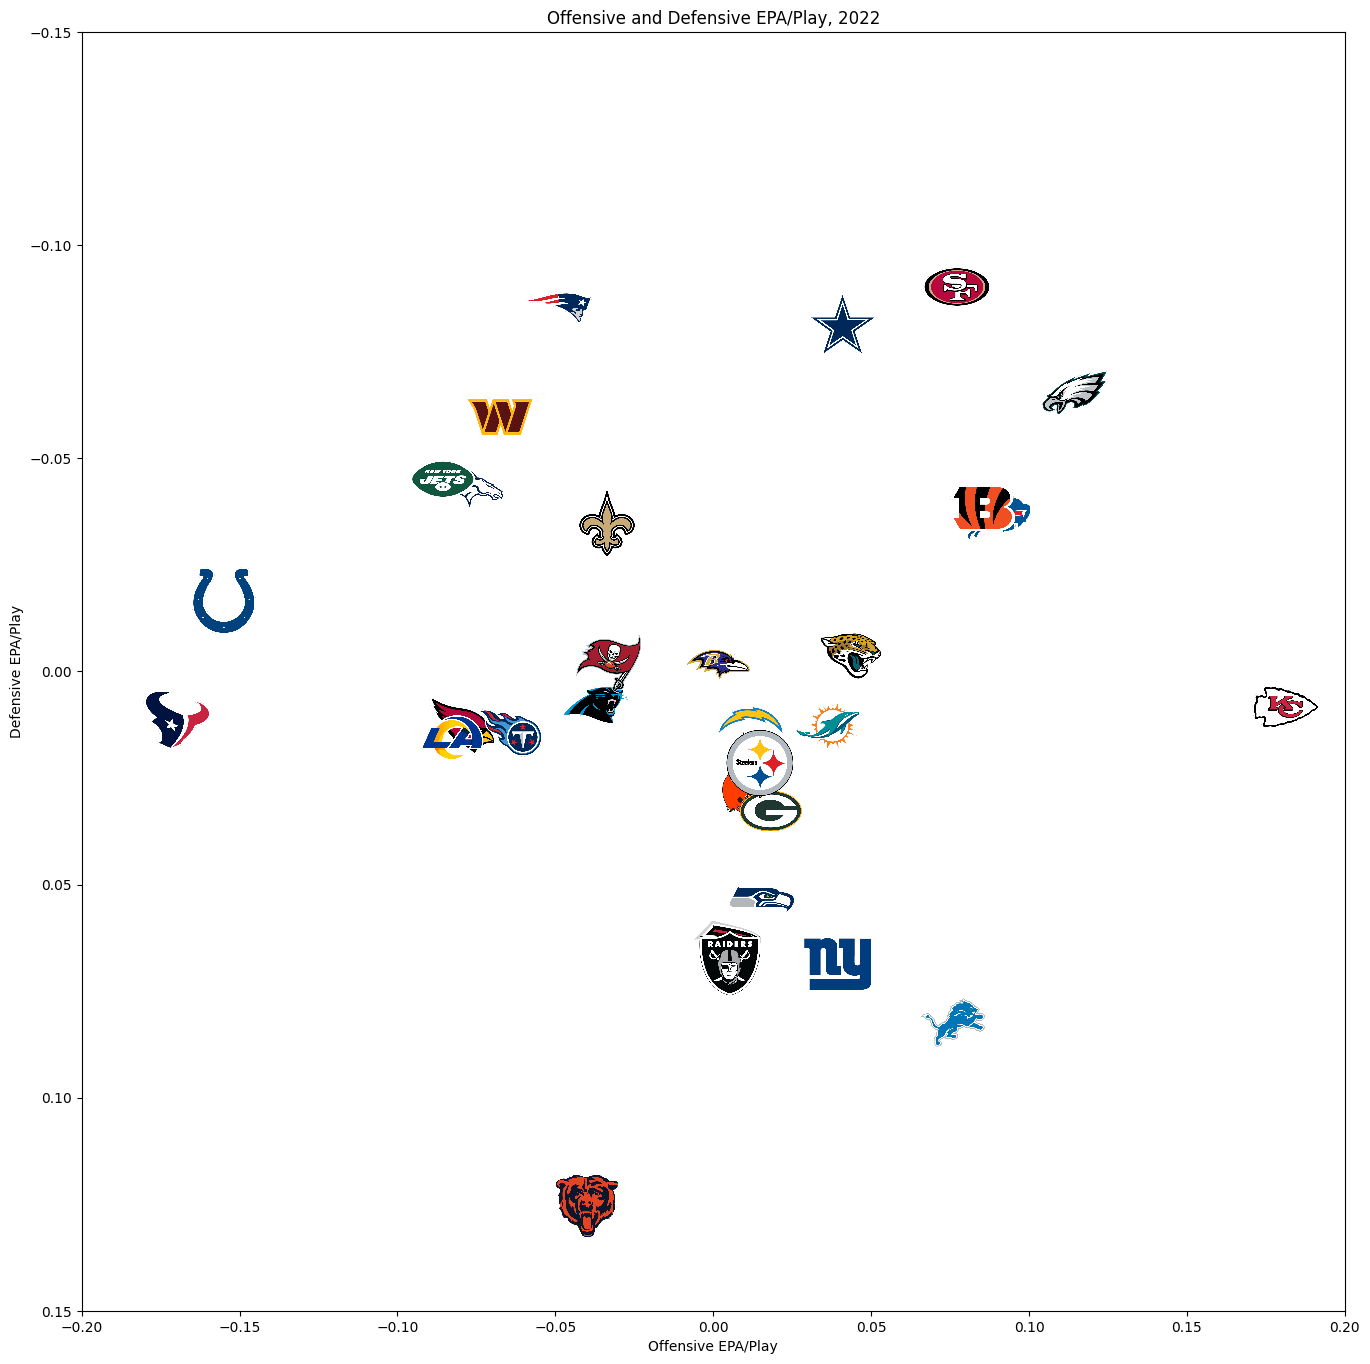

In [33]:
plt.rcParams["figure.figsize"] = [15, 15]
plt.rcParams["figure.autolayout"] = True

def getImage(path):
    return OffsetImage(plt.imread(path, format="tif"), zoom=.1)

x = epa_with_logos['offensive_epa']
y = epa_with_logos['defensive_epa']
paths = epa_with_logos['logo_path']

fig, ax = plt.subplots()

for x0, y0, path in zip(x, y, paths):
   ab = AnnotationBbox(getImage(path), (x0, y0), frameon=False)
   ax.add_artist(ab)

plt.xlim(-0.2, 0.2)
plt.ylim(0.15, -0.15)
plt.title("Offensive and Defensive EPA/Play, 2022")
plt.xlabel("Offensive EPA/Play")
plt.ylabel("Defensive EPA/Play")
plt.show()